In [17]:
# for d in os.listdir("./train"):
#     for (dirpath, dirnames, filenames) in os.walk(os.path.join('./train', d)):
#         for f in filenames[:15]:
#             os.remove(os.path.join('./train', d,f))
            
# for d in os.listdir("./test"):
#     for (dirpath, dirnames, filenames) in os.walk(os.path.join('./test', d)):
#         for f in filenames[15:]:
#             print(os.path.join('./test', d,f))
#             os.remove(os.path.join('./test', d,f))|
        


In [18]:
!python -V

Python 3.8.10


In [19]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten,Dense,Dropout,Conv2D,MaxPooling2D
import matplotlib.pyplot as plt
import numpy as np
from keras.applications.vgg16 import VGG16
# from tensorflow.python.compiler.mlcompute import mlcompute
# from tensorflow.python.framework.ops import disable_eager_execution
# disable_eager_execution()
# mlcompute.set_mlc_device(device_name='gpu')
# tf.config.run_functions_eagerly(False)
# print(tf.executing_eagerly())

In [20]:
import keras_preprocessing
from keras_preprocessing import image
from keras_preprocessing.image import ImageDataGenerator

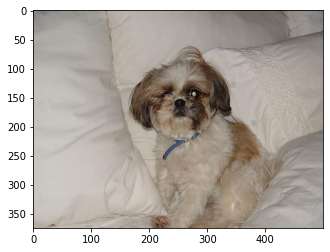

In [21]:
img = mpimg.imread("./images/Images/n02086240-Shih-Tzu/n02086240_9.jpg")
plt.imshow(img)
plt.show()

In [22]:
img_size = 150
TRAINING_DIR = "./images/Images/"
training_datagen = ImageDataGenerator(
    validation_split= 0.1,
    rescale = 1./255,
#     rotation_range=40,
#     width_shift_range=0.2,
#     height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)


train_generator = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(img_size,img_size),
    shuffle = True,
    class_mode='categorical',
    batch_size=126,
    subset='training'
)

validation_datagen = ImageDataGenerator(validation_split = 0.1 ,rescale = 1./255)

validation_generator = validation_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(img_size,img_size),
    class_mode='categorical',
    batch_size=126,
    subset='validation'
)

Found 2671 images belonging to 16 classes.
Found 288 images belonging to 16 classes.


Found 2671 images belonging to 16 classes.


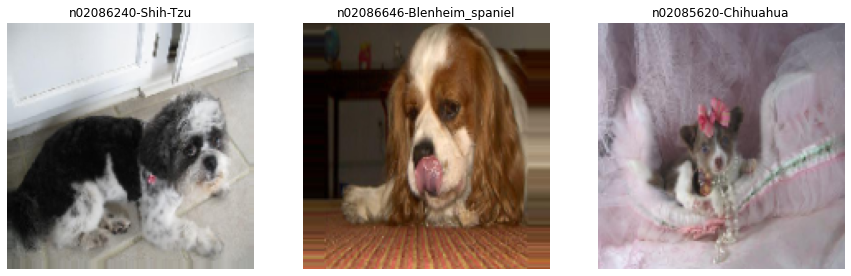

In [23]:
aug_iter = training_datagen.flow_from_directory(
    TRAINING_DIR,
    target_size=(img_size,img_size),
    batch_size=1,
    class_mode='categorical',
    subset='training'
)

# mostrar imagenes horizontales
fig, ax = plt.subplots(nrows=1, ncols=3, figsize=(15,15))

# obtiene los labels de las clases de flow from directory
def getLabel(index):
    return (list(aug_iter.class_indices.keys())[list(aug_iter.class_indices.values()).index(index)])
# mostrar 3 imagenes
for i in range(3):
    
    obj = next(aug_iter)
    
    # obtenemos el index de cada clase
    class_index = np.argmax(obj[1])
    
    # obtener imagenes del generador
    image = obj[0]

    # mostar 3 imagenes
    ax[i].imshow(image.reshape(img_size, img_size, 3))
    ax[i].set_title(getLabel(class_index))
    ax[i].axis('off')

In [24]:
checkpoint_filepath = './vgcc_lite/checkpoint'
model_checkpoint_callback = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath)

In [29]:
base_model = VGG16(include_top=False,
                  input_shape = (img_size,img_size,3),
                  weights = 'imagenet')

for layer in base_model.layers:
    layer.trainable = False
    
    
model = tf.keras.models.Sequential([
    base_model,
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(50, 50,3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     tf.keras.layers.Flatten(),
    tf.keras.layers.GlobalAveragePooling2D(),
    tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(512, activation='relu'),
    tf.keras.layers.Dense(16, activation='softmax')
])

model.compile(loss = 'categorical_crossentropy', optimizer='adam', metrics=['accuracy'] )

In [30]:
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg16 (Functional)           (None, 4, 4, 512)         14714688  
_________________________________________________________________
global_average_pooling2d_1 ( (None, 512)               0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 512)               0         
_________________________________________________________________
dense_1 (Dense)              (None, 16)                8208      
Total params: 14,722,896
Trainable params: 8,208
Non-trainable params: 14,714,688
_________________________________________________________________


In [ ]:
#model.load_weights(checkpoint_filepath)
history = model.fit(train_generator, epochs=100, steps_per_epoch=10,validation_data = validation_generator, verbose = 1, 
                    validation_steps=3,callbacks=[model_checkpoint_callback])

Epoch 1/100
10/10 [==============================] - 39s 4s/step - loss: 3.0659 - accuracy: 0.0452 - val_loss: 2.8127 - val_accuracy: 0.0625
INFO:tensorflow:Assets written to: ./vgcc_lite/checkpoint/assets
Epoch 2/100
10/10 [==============================] - 39s 4s/step - loss: 2.8315 - accuracy: 0.0690 - val_loss: 2.7465 - val_accuracy: 0.1007
INFO:tensorflow:Assets written to: ./vgcc_lite/checkpoint/assets
Epoch 3/100
10/10 [==============================] - 37s 4s/step - loss: 2.7464 - accuracy: 0.1035 - val_loss: 2.7058 - val_accuracy: 0.1215
INFO:tensorflow:Assets written to: ./vgcc_lite/checkpoint/assets
Epoch 4/100
10/10 [==============================] - 39s 4s/step - loss: 2.7338 - accuracy: 0.1317 - val_loss: 2.6573 - val_accuracy: 0.1840
INFO:tensorflow:Assets written to: ./vgcc_lite/checkpoint/assets
Epoch 5/100
10/10 [==============================] - 39s 4s/step - loss: 2.6640 - accuracy: 0.1460 - val_loss: 2.6124 - val_accuracy: 0.2153
INFO:tensorflow:Assets written to: 

INFO:tensorflow:Assets written to: ./vgcc_lite/checkpoint/assets
Epoch 41/100
10/10 [==============================] - 40s 4s/step - loss: 1.9281 - accuracy: 0.4437 - val_loss: 1.9266 - val_accuracy: 0.4688
INFO:tensorflow:Assets written to: ./vgcc_lite/checkpoint/assets
Epoch 42/100
10/10 [==============================] - 37s 4s/step - loss: 1.8916 - accuracy: 0.4659 - val_loss: 1.9235 - val_accuracy: 0.4653
INFO:tensorflow:Assets written to: ./vgcc_lite/checkpoint/assets
Epoch 43/100
10/10 [==============================] - 38s 4s/step - loss: 1.9212 - accuracy: 0.4443 - val_loss: 1.9105 - val_accuracy: 0.4549
INFO:tensorflow:Assets written to: ./vgcc_lite/checkpoint/assets
Epoch 44/100
10/10 [==============================] - 37s 4s/step - loss: 1.9110 - accuracy: 0.4443 - val_loss: 1.9056 - val_accuracy: 0.4688
INFO:tensorflow:Assets written to: ./vgcc_lite/checkpoint/assets
Epoch 45/100
10/10 [==============================] - 38s 4s/step - loss: 1.9081 - accuracy: 0.4331 - val_l

In [ ]:
import matplotlib.pyplot as plt
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')
plt.legend(loc=0)
plt.figure()


plt.show()

In [ ]:
# model_2 = tf.keras.models.Sequential([
#     # Note the input shape is the desired size of the image 150x150 with 3 bytes color
#     # This is the first convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu', input_shape=(50, 50,3)),
#     tf.keras.layers.MaxPooling2D(2, 2),
#     # The second convolution
#     tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The third convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # The fourth convolution
#     tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
#     tf.keras.layers.MaxPooling2D(2,2),
#     # Flatten the results to feed into a DNN
#     tf.keras.layers.Flatten(),
#     tf.keras.layers.Dropout(0.2),
#     # 512 neuron hidden layer
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dropout(0.2),
#     tf.keras.layers.Dense(512, activation='relu'),
#     tf.keras.layers.Dense(120, activation='softmax')
# ])

# checkpoint_filepath = './tmp/checkpoint2'
# model_checkpoint_callback2 = tf.keras.callbacks.ModelCheckpoint(
#     filepath=checkpoint_filepath)

# model_2.compile(loss = 'categorical_crossentropy', optimizer='RMSprop', metrics=['accuracy'])

In [ ]:
# history2 = model_2.fit(train_generator, epochs=105, steps_per_epoch=2,validation_data = validation_generator, verbose = 1, validation_steps=3,callbacks=[model_checkpoint_callback2])

In [ ]:
# model_2.summary()

In [ ]:
# import matplotlib.pyplot as plt
# acc = history2.history['accuracy']
# val_acc = history2.history['val_accuracy']
# loss = history2.history['loss']
# val_loss = history2.history['val_loss']

# epochs = range(len(acc))

# plt.plot(epochs, acc, 'r', label='Training accuracy')
# plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
# plt.title('Training and validation accuracy')
# plt.legend(loc=0)
# plt.figure()

# plt.show()